In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.experimental import RMSprop, Adam
import gc
import random

tf.keras.utils.set_random_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam
import gc
import random
from tensorflow.keras.optimizers import RMSprop
import keras_tuner

tf.random.set_seed(42)
random.seed(42)

In [3]:
def ReSize(image, size):
    resizedimg=cv2.resize(image,(size,size))
    return resizedimg 

def normalize(resimg):
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    img_normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img1=cv2.cvtColor(img_normalized,cv2.COLOR_BGR2RGB)
    return img1    

def gray(normimg):
    img=cv2.cvtColor(normimg, cv2.COLOR_BGR2GRAY)
    grey=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return grey

def Brightnessandcontrast(normimg):
    Bright = 20
    Contrast = 1
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    adjusted = cv2.convertScaleAbs(img, alpha=Contrast, beta=Bright)
    rgbadjusted=cv2.cvtColor(adjusted,cv2.COLOR_BGR2RGB)
    return rgbadjusted

def mean_noise_reduction(normimg):
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    filteredimg = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    return rgbfilteredimg

def three_noise_reduction(normimg):
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    filteredimg =cv2.GaussianBlur(img,(5,5),0)
    #filteredimg=cv2.blur(img,(5,5))
    #filteredimg=cv2.medianBlur(img,5)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    return rgbfilteredimg


In [4]:
def read_data(list, photo_size, flag):  
    data = []
    if flag == 1:
        for i in range(len(list)):
            for filename in os.listdir(list[i]):
                img  = cv2.imread(list[i] + filename)
                img = ReSize(img, photo_size)
                img = normalize(img)
                img = three_noise_reduction(img)
                data.append([img, i%2])
    elif flag == 2:
        for filename in os.listdir(list):
            img  = cv2.imread(list + filename)
            img = ReSize(img, photo_size)
            img = normalize(img)
            img = three_noise_reduction(img)
            if filename.find("Non_Autistic") != -1:
                data.append([img, 0])
            else:
                data.append([img, 1])

    random.shuffle(data)
    
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    
    x = np.array(x)
    y = np.array(y)
    return x, y

In [ ]:
"""import random
def read_data(list, photo_size = 256, valid_flag = False):  
    data = []
    for i in range(len(list)):
        for filename in os.listdir(list[i]):
            img  = cv2.imread(list[i] + filename)
            img = cv2.resize(img,(photo_size,photo_size))
            
            if filename.find("Non_Autistic") !=-1:
                data.append([img, [0,1]])
            elif filename.find("Autistic")!=-1:
                data.append([img, [1,0]])
            #for valid data
            elif list[i].find("Non_Autistic")!=-1:
                data.append([img, [0,1]])
            else:
                data.append([img, [1,0]])
    
    random.shuffle(data)
    if valid_flag:
        return data
    
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    
    x = np.array(x)
    y = np.array(y)
    x = x / 255
    return x, y


train_add_autis = "/kaggle/input/autism-image-data/AutismDataset/train/"

X_train, y_train = read_data([train_add_autis])

X_test, y_test = read_data(["/kaggle/input/autism-image-data/AutismDataset/test/"])

na = "/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/"
a = "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/"

x_v, y_v = read_data([na, a])"""

In [15]:
x_train, y_train = read_data("/kaggle/input/autism-image-data/AutismDataset/train/" , 224 , 2 )
print(x_train.shape)
print(y_train.shape)

gc.collect()

(2540, 224, 224, 3)
(2540,)


2013

In [16]:
y_train.sum(axis = 0)

1270

In [17]:
x_test, y_test = read_data("/kaggle/input/autism-image-data/AutismDataset/test/" , 224 , 2 )
print(x_test.shape)
print(y_test.shape)

print(y_test.sum(axis = 0))

(300, 224, 224, 3)
(300,)
150


In [18]:
lis = ["/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/" , "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/"]
x_valid, y_valid = read_data(lis , 224 , 1)
print(x_valid.shape)
print(y_valid.shape)

print(y_valid.sum(axis = 0))

(100, 224, 224, 3)
(100,)
50


In [ ]:
"""x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9, test_size = 0.1, stratify = y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size = 0.1, stratify = y_train)
del x, y
gc.collect()"""

In [ ]:
"""print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)"""

In [9]:
def make_XCPmodel(hp):
    size = 256
    xception = tf.keras.applications.Xception(input_shape=(size, size,3), include_top=False, weights="imagenet" )
    
    model = tf.keras.models.Sequential([
    xception,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dropout( hp.Choice('drop_out1',values= np.linspace(0, 0.9999999999999999, 15).tolist()) ),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(2, "softmax")
    ])
    
    model.compile(optimizer=RMSprop(hp.Choice('learning_rate',values=[0.001,0.0001,0.00001])),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['acc'])
    gc.collect()
    return model

In [11]:
tuner =  keras_tuner.RandomSearch(
                   make_XCPmodel,
                   objective = "val_acc", #optimize val acc
                   max_trials=20, 
                   executions_per_trial=3,
                   directory='/kaggle/working/', #Saving dir
                   project_name='xcp2_hpTunning')
tuner.search_space_summary()

83683744/83683744 [==============================] - 0s 0us/step
Search space summary
Default search space size: 2
drop_out1 (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.07142857142857142, 0.14285714285714285, 0.21428571428571427, 0.2857142857142857, 0.3571428571428571, 0.42857142857142855, 0.5, 0.5714285714285714, 0.6428571428571428, 0.7142857142857142, 0.7857142857142857, 0.8571428571428571, 0.9285714285714285, 0.9999999999999999], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}


In [12]:
checkpoint = keras.callbacks.ModelCheckpoint("/kaggle/working/xcp_v1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False)

tuner.search(x_train, y_train, validation_data = (x_valid , y_valid), epochs = 10, batch_size = 32,  callbacks = [checkpoint])

Trial 20 Complete [00h 22m 10s]
val_acc: 0.5066666603088379

Best val_acc So Far: 0.8566666841506958
Total elapsed time: 07h 24m 24s


In [13]:
tuner.results_summary()

Results summary
Results in /kaggle/working/xcp2_hpTunning
Showing 10 best trials
Trial summary
Hyperparameters:
drop_out1: 0.7142857142857142
learning_rate: 0.0001
Score: 0.8566666841506958
Trial summary
Hyperparameters:
drop_out1: 0.5714285714285714
learning_rate: 0.0001
Score: 0.8566666642824808
Trial summary
Hyperparameters:
drop_out1: 0.0
learning_rate: 0.0001
Score: 0.8533333341280619
Trial summary
Hyperparameters:
drop_out1: 0.5714285714285714
learning_rate: 0.001
Score: 0.8499999841054281
Trial summary
Hyperparameters:
drop_out1: 0.14285714285714285
learning_rate: 0.0001
Score: 0.846666673819224
Trial summary
Hyperparameters:
drop_out1: 0.21428571428571427
learning_rate: 0.001
Score: 0.846666673819224
Trial summary
Hyperparameters:
drop_out1: 0.07142857142857142
learning_rate: 0.0001
Score: 0.8466666539510092
Trial summary
Hyperparameters:
drop_out1: 0.3571428571428571
learning_rate: 0.001
Score: 0.8433333237965902
Trial summary
Hyperparameters:
drop_out1: 0.7857142857142857
lea

In [12]:
def make_model(size):
    xception = tf.keras.applications.Xception(input_shape=(size, size,3), include_top=False, weights="imagenet" )
    
    model = tf.keras.models.Sequential([
    xception,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(2, "softmax")
    ])   
    return model

In [22]:
model = make_model(224)
model.compile(
      optimizer="adam",
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']) 
sample_weight = np.ones(x_train.shape[0]) / x_train.shape[0]
checkpoint = keras.callbacks.ModelCheckpoint("/kaggle/working/xcp_v1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False)
histroy = model.fit(x_train, y_train, sample_weight=sample_weight, validation_data = [x_valid, y_valid], epochs = 10 ,  batch_size = 32, callbacks = [checkpoint])
gc.collect()
print("train:")
model.evaluate(x_train, y_train)
print("valid:")
model.evaluate(x_valid, y_valid)
print("test:")
model.evaluate(x_test, y_test)

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 1.9536e-04 - acc: 0.7598
Epoch 1: val_acc improved from -inf to 0.63000, saving model to /kaggle/working/xcp_v1.h5
80/80 [==============================] - 36s 398ms/step - loss: 1.9536e-04 - acc: 0.7598 - val_loss: 2.4245 - val_acc: 0.6300
Epoch 2/10
80/80 [==============================] - ETA: 0s - loss: 1.0930e-04 - acc: 0.8909
Epoch 2: val_acc improved from 0.63000 to 0.67000, saving model to /kaggle/working/xcp_v1.h5
80/80 [==============================] - 31s 387ms/step - loss: 1.0930e-04 - acc: 0.8909 - val_loss: 0.8691 - val_acc: 0.6700
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 7.9285e-05 - acc: 0.9232
Epoch 3: val_acc improved from 0.67000 to 0.72000, saving model to /kaggle/working/xcp_v1.h5
80/80 [==============================] - 31s 386ms/step - loss: 7.9285e-05 - acc: 0.9232 - val_loss: 1.1808 - val_acc: 0.7200
Epoch 4/10
80/80 [==============================] - ETA: 0s - loss:

[0.4882008731365204, 0.8999999761581421]

In [23]:
model.save("x_id_52.h5")

In [52]:
print("train:")
model.evaluate(x_train, y_train)
print("valid:")
model.evaluate(x_valid, y_valid)
print("test:")
model.evaluate(x_test, y_test)

train:
80/80 [==============================] - 8s 102ms/step - loss: 0.4445 - acc: 0.8996
valid:
4/4 [==============================] - 0s 73ms/step - loss: 1.4187 - acc: 0.7400
test:
10/10 [==============================] - 1s 96ms/step - loss: 1.3797 - acc: 0.8000


2037

In [15]:
histroy.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

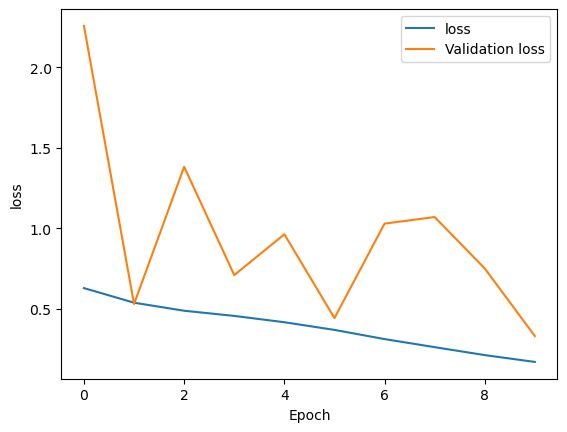

In [57]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
#plt.ylim(0 , 1)
#plt.xlim(0 , 28 , 1)
plt.legend(["loss","Validation loss","loss","Validation Loss"])
plt.show()